In [1]:
#导入必须的库
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

plt.style.use('fivethirtyeight')#画图风格
np.random.seed(100)

window=31 #时间窗   test集 的數據量 
label_dim=60 #标签纬度
scale=100 #归一化参数
amount_of_features=1 #特征数量
d=0.05 #dropout系数
batch_size=12 #批训练数量
epoch=200 #总迭代次数

train_file='2015_2018_train.csv' #读取训练集地址
test_file='2015_2018_test.csv' #读取測試集地址
save_file='2015_2018_predict.csv' #储存预测值地址

In [2]:
data=pd.read_csv(train_file,header=0) 
data=data['BR13']#选数据集的哪一列

#构造针对机器学习模型的数据集
data=data.values 
dataset=data
for i in range(window+label_dim-1): #類似shift()概念
    zero=np.zeros(i+1) #生成一個元素為 i+1 個 0 的一維矩陣
    temp=np.append(data[i+1:],zero) #NumPy 陣列追加，(arr:要新增元素的陣列,values:被新增陣列, axis = None)
    dataset=np.row_stack((dataset,temp)) #行合併  
dataset=pd.DataFrame(dataset).T #轉置資料
dataset=dataset.iloc[:-(window+label_dim)] #倒數window+label_dim之前的行數據
dataset=dataset/scale #进行伪归一化
print(dataset)

"""
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(dataset,annot=False)
plt.show()#展示下原始数据集
"""

          0       1       2       3       4       5       6       7       8   \
0     108.30  103.99  120.94  115.03  120.33  130.83   98.42    1.06  102.09   
1     103.99  120.94  115.03  120.33  130.83   98.42    1.06  102.09  127.94   
2     120.94  115.03  120.33  130.83   98.42    1.06  102.09  127.94  123.16   
3     115.03  120.33  130.83   98.42    1.06  102.09  127.94  123.16  124.29   
4     120.33  130.83   98.42    1.06  102.09  127.94  123.16  124.29  133.13   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
1122  124.74  119.52  115.45  113.45  128.09   94.25   94.12  123.66  114.28   
1123  119.52  115.45  113.45  128.09   94.25   94.12  123.66  114.28  116.97   
1124  115.45  113.45  128.09   94.25   94.12  123.66  114.28  116.97  116.62   
1125  113.45  128.09   94.25   94.12  123.66  114.28  116.97  116.62  134.27   
1126  128.09   94.25   94.12  123.66  114.28  116.97  116.62  134.27   95.40   

          9   ...      81      82      

'\nimport seaborn as sns\nplt.figure(figsize=(10,5))\nsns.heatmap(dataset,annot=False)\nplt.show()#展示下原始数据集\n'

In [3]:
#划分特征与标签
X=dataset.iloc[:,:window]
y=dataset.iloc[:,-label_dim:]

In [4]:
#构造训练集测试集
X,y=X.values,y.values
print(X.shape)#通过输出训练集测试集的大小来判断数据格式正确。
print(y.shape)

(1127, 31)
(1127, 60)


In [5]:
#LSTM神经网络的数据集要稍微做一些修改
X= np.reshape(X, (X.shape[0],X.shape[1], amount_of_features))
print(X.shape)
print(y.shape)

(1127, 31, 1)
(1127, 60)


In [6]:
#建立LSTM模型 训练
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation,Dropout
from keras.layers.recurrent import LSTM
#建立训练模型过程
model = Sequential()#建立层次模型
model.add(LSTM(32, input_shape=(window, amount_of_features), return_sequences=False))#建立LSTM层
#model.add(Dropout(d))
model.add(Dense(label_dim*2,activation='relu'))   #建立全连接层  
#model.add(Dropout(d))
model.add(Dense(label_dim))
model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])
model.summary()

Using TensorFlow backend.
F:\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
F:\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
F:\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
F:\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1) or '1type

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 32)                4352      
_________________________________________________________________
dense_1 (Dense)              (None, 120)               3960      
_________________________________________________________________
dense_2 (Dense)              (None, 60)                7260      
Total params: 15,572
Trainable params: 15,572
Non-trainable params: 0
_________________________________________________________________


In [7]:
#神经网络训练及结果
history = model.fit(X, y, epochs =epoch, batch_size = batch_size,verbose=1,validation_split=0.1) #训练模型nb_epoch次


Train on 1014 samples, validate on 113 samples
Epoch 1/200
1014/1014 [==============================] - 1s 835us/step - loss: 11946.6779 - accuracy: 0.0148 - val_loss: 10711.2783 - val_accuracy: 0.0354
Epoch 2/200
1014/1014 [==============================] - 1s 591us/step - loss: 6062.1561 - accuracy: 0.0099 - val_loss: 2418.7659 - val_accuracy: 0.0177
Epoch 3/200
1014/1014 [==============================] - 1s 615us/step - loss: 694.8602 - accuracy: 0.0128 - val_loss: 200.0129 - val_accuracy: 0.0177
Epoch 4/200
1014/1014 [==============================] - 1s 646us/step - loss: 217.7772 - accuracy: 0.0128 - val_loss: 195.6786 - val_accuracy: 0.0177
Epoch 5/200
1014/1014 [==============================] - 1s 804us/step - loss: 216.7923 - accuracy: 0.0108 - val_loss: 197.2829 - val_accuracy: 0.0088
Epoch 6/200
1014/1014 [==============================] - 1s 717us/step - loss: 216.6485 - accuracy: 0.0187 - val_loss: 196.7442 - val_accuracy: 0.0177
Epoch 7/200
1014/1014 [=================

1014/1014 [==============================] - 1s 596us/step - loss: 209.2331 - accuracy: 0.0207 - val_loss: 187.9667 - val_accuracy: 0.0177
Epoch 54/200
1014/1014 [==============================] - 1s 574us/step - loss: 207.3635 - accuracy: 0.0197 - val_loss: 186.5605 - val_accuracy: 0.0177
Epoch 55/200
1014/1014 [==============================] - 1s 582us/step - loss: 207.8100 - accuracy: 0.0227 - val_loss: 187.9616 - val_accuracy: 0.0088
Epoch 56/200
1014/1014 [==============================] - 1s 629us/step - loss: 208.0744 - accuracy: 0.0148 - val_loss: 185.8979 - val_accuracy: 0.0000e+00
Epoch 57/200
1014/1014 [==============================] - 1s 654us/step - loss: 207.8339 - accuracy: 0.0148 - val_loss: 190.0701 - val_accuracy: 0.0088
Epoch 58/200
1014/1014 [==============================] - 1s 592us/step - loss: 207.7198 - accuracy: 0.0178 - val_loss: 187.0574 - val_accuracy: 0.0177
Epoch 59/200
1014/1014 [==============================] - 1s 791us/step - loss: 207.7319 - accura

Epoch 107/200
1014/1014 [==============================] - 1s 595us/step - loss: 194.0745 - accuracy: 0.0503 - val_loss: 170.6427 - val_accuracy: 0.0265
Epoch 108/200
1014/1014 [==============================] - 1s 671us/step - loss: 193.0869 - accuracy: 0.0345 - val_loss: 170.6143 - val_accuracy: 0.0442
Epoch 109/200
1014/1014 [==============================] - 1s 605us/step - loss: 194.3929 - accuracy: 0.0355 - val_loss: 170.7841 - val_accuracy: 0.0265
Epoch 110/200
1014/1014 [==============================] - 1s 595us/step - loss: 193.8883 - accuracy: 0.0444 - val_loss: 170.9589 - val_accuracy: 0.0265
Epoch 111/200
1014/1014 [==============================] - 1s 666us/step - loss: 193.3746 - accuracy: 0.0365 - val_loss: 172.4089 - val_accuracy: 0.0442
Epoch 112/200
1014/1014 [==============================] - 1s 597us/step - loss: 192.8420 - accuracy: 0.0385 - val_loss: 168.3862 - val_accuracy: 0.0354
Epoch 113/200
1014/1014 [==============================] - 1s 671us/step - loss: 1

1014/1014 [==============================] - 1s 792us/step - loss: 186.4741 - accuracy: 0.0473 - val_loss: 161.0086 - val_accuracy: 0.0265
Epoch 161/200
1014/1014 [==============================] - 1s 1ms/step - loss: 186.6585 - accuracy: 0.0513 - val_loss: 159.6265 - val_accuracy: 0.0442
Epoch 162/200
1014/1014 [==============================] - 1s 789us/step - loss: 185.9080 - accuracy: 0.0434 - val_loss: 160.5546 - val_accuracy: 0.0177
Epoch 163/200
1014/1014 [==============================] - 1s 651us/step - loss: 186.3660 - accuracy: 0.0394 - val_loss: 158.8589 - val_accuracy: 0.0265
Epoch 164/200
1014/1014 [==============================] - 1s 645us/step - loss: 185.9166 - accuracy: 0.0404 - val_loss: 156.9785 - val_accuracy: 0.0088
Epoch 165/200
1014/1014 [==============================] - 1s 577us/step - loss: 185.2070 - accuracy: 0.0434 - val_loss: 157.6944 - val_accuracy: 0.0177
Epoch 166/200
1014/1014 [==============================] - 1s 582us/step - loss: 184.4080 - accura

In [8]:
#筛选测试集
test=pd.read_csv(test_file,header=0) 
test=test['BR13']/scale#选数据集的哪一列
test=np.reshape(test.values, (1, window,amount_of_features))
print(test.shape)

(1, 31, 1)


In [9]:
#实际预测
predict=model.predict(test)[0,:]*scale
#储存文件
(pd.DataFrame(predict)).to_csv(save_file)
print(predict)

[11801.708  11147.919  10710.977  11274.203  11401.098  10301.408
 10923.961  11637.754  11197.061  10720.234  11150.758  11298.449
 10343.178  10955.659  11633.405  11182.31   10723.903  11365.004
 11373.892  10311.686  10939.853  11786.319  11366.36   10769.553
 11324.281  11373.4    10256.366  10968.801  11835.09   11292.9795
 10779.08   11351.683  11504.228  10476.72   11069.573  11852.739
 11286.263  10843.255  11418.498  11559.188  10517.089  11127.843
 11881.453  11329.145  10711.339  11322.313  11561.622  10596.757
 11161.035  11961.751  11359.467  10840.9    11499.662  11585.564
 10502.707  11161.676  11911.846  11443.537  11028.401  11655.915 ]


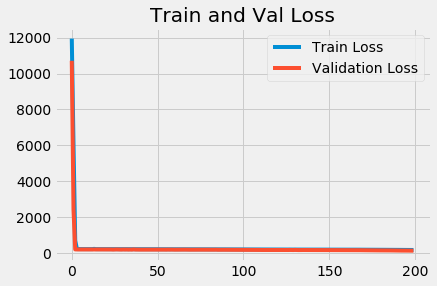

In [10]:
#迭代图像
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epoch)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Train and Val Loss')
plt.show()

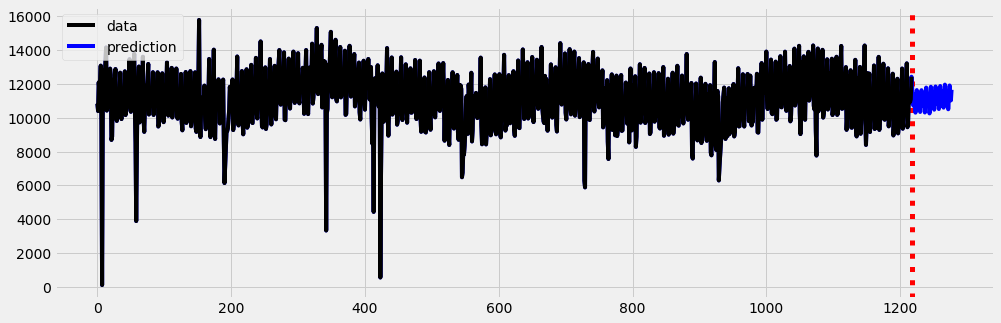

In [11]:
data_times=np.arange(len(data)) #np.arange(起始,終點,間距)
all_data=np.hstack((data,predict)) #np.hstack 沿著水準方向將陣列堆疊起來
predicted_times=np.arange(len(all_data))

plt.figure(figsize=(15, 5))
plt.axvline(len(data), linestyle="dotted", linewidth=5, color='r') #axvline 畫垂直線
predicted_lines = plt.plot(predicted_times, all_data, label="prediction", color="b")
data_lines = plt.plot(data_times, data, label="data", color="k")
plt.legend(handles=[data_lines[0], predicted_lines[0]],loc="upper left")
#为训练，验证，预测数据分别创建图例
plt.show()